In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import random
import geopandas as gpd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from shapely.geometry import point

In [2]:
df = pd.read_excel('9ja.xlsx') #, index_col=0  


In [3]:
df

,Date,Location,Suspected Cases,Nr. Of New Cases,Total Confirmed Cases,Source,Deaths,Recovered,Long,Lat
0,2020-02-27,Ogun,NaN,1,1,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,8.52,8.48
1,2020-02-27,Lagos,NaN,0,0,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,3.33,6.58
2,2020-03-01,Ogun,NaN,0,1,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,8.52,8.48
3,2020-03-01,Lagos,NaN,0,0,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,3.33,6.58
4,2020-03-02,Ogun,NaN,0,1,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,8.52,8.48
...,...,...,...,...,...,...,...,...,...,...
299,2020-03-30,Oyo,N/a,1,8,https://twitter.com/NCDCgov/status/12447161352...,0,0,3.90,7.38
300,2020-03-30,Plateau,N/a,0,0,https://twitter.com/NCDCgov/status/12447161352...,0,0,8.90,9.92
301,2020-03-30,Rivers,N/a,0,1,https://twitter.com/NCDCgov/status/12447161352...,0,0,7.00,4.75
302,2020-03-30,Sokoto,N/a,0,0,https://twitter.com/NCDCgov/status/12447161352...,0,0,13.04,5.21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   304 non-null    datetime64[ns]
 1   Location               304 non-null    object        
 2   Suspected Cases        292 non-null    object        
 3   Nr. Of New Cases       304 non-null    int64         
 4   Total Confirmed Cases  304 non-null    int64         
 5   Source                 304 non-null    object        
 6   Deaths                 304 non-null    int64         
 7   Recovered              304 non-null    int64         
 8   Long                   304 non-null    float64       
 9   Lat                    304 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 23.9+ KB


In [5]:
df.drop(['Source '],inplace=True, axis=1)

In [6]:
df.head()

,Date,Location,Suspected Cases,Nr. Of New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat
0,2020-02-27,Ogun,NaN,1,1,0,0,8.52,8.48
1,2020-02-27,Lagos,NaN,0,0,0,0,3.33,6.58
2,2020-03-01,Ogun,NaN,0,1,0,0,8.52,8.48
3,2020-03-01,Lagos,NaN,0,0,0,0,3.33,6.58
4,2020-03-02,Ogun,NaN,0,1,0,0,8.52,8.48


In [7]:
df.rename(columns = {'Nr. Of New Cases ' : 'New Cases'},inplace=True)

In [8]:
df.head()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat
0,2020-02-27,Ogun,NaN,1,1,0,0,8.52,8.48
1,2020-02-27,Lagos,NaN,0,0,0,0,3.33,6.58
2,2020-03-01,Ogun,NaN,0,1,0,0,8.52,8.48
3,2020-03-01,Lagos,NaN,0,0,0,0,3.33,6.58
4,2020-03-02,Ogun,NaN,0,1,0,0,8.52,8.48


In [9]:
df['Active_Cases'] = df['Total Confirmed Cases'] - (df['Recovered'] + df['Deaths'])
df.head()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
0,2020-02-27,Ogun,NaN,1,1,0,0,8.52,8.48,1
1,2020-02-27,Lagos,NaN,0,0,0,0,3.33,6.58,0
2,2020-03-01,Ogun,NaN,0,1,0,0,8.52,8.48,1
3,2020-03-01,Lagos,NaN,0,0,0,0,3.33,6.58,0
4,2020-03-02,Ogun,NaN,0,1,0,0,8.52,8.48,1


In [10]:
df.describe()

,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.434211,2.161184,0.023026,0.075658,8.105658,7.468191,2.062500
std,1.669652,8.627820,0.150234,0.350671,3.000191,1.866211,8.597684
min,0.000000,0.000000,0.000000,0.000000,3.330000,4.230000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,5.600000,6.320000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.100000,7.380000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,10.520000,8.510000,1.000000
max,13.000000,81.000000,1.000000,2.000000,13.040000,11.730000,81.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   304 non-null    datetime64[ns]
 1   Location               304 non-null    object        
 2   Suspected Cases        292 non-null    object        
 3   New Cases              304 non-null    int64         
 4   Total Confirmed Cases  304 non-null    int64         
 5   Deaths                 304 non-null    int64         
 6   Recovered              304 non-null    int64         
 7   Long                   304 non-null    float64       
 8   Lat                    304 non-null    float64       
 9   Active_Cases           304 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 23.9+ KB


In [12]:
df.dropna(inplace=True)

In [13]:
df.head()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
12,2020-03-06,Ogun,3,0,1,0,0,8.52,8.48,1
13,2020-03-06,Lagos,9,0,0,0,0,3.33,6.58,0
14,2020-03-06,FCT,7,0,0,0,0,10.00,9.00,0
15,2020-03-06,Kano,1,0,0,0,0,12.00,8.51,0
16,2020-03-06,Edo,1,0,0,0,0,5.60,6.32,0


Text(0.5, 1.0, 'Plotting Spatial Data on Nigeria Wards Map')

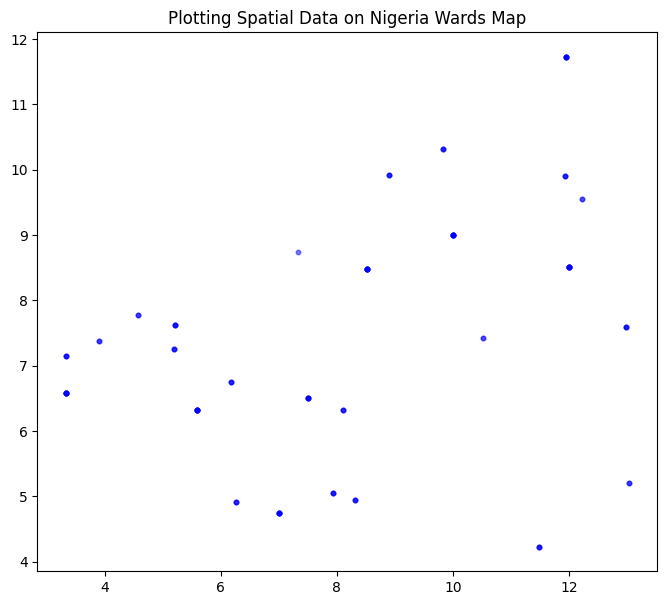

In [14]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.Long, df.Lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Nigeria Wards Map')

In [ ]:
# nigeria_administrative_boundaries_national_polygon

In [10]:
nigeria = gpd.read_file("nigeria_States_level_1.shp")
nigeria.head()

,shape1,shapeiso,shapeid,shapegroup,shapetype,shape0,geometry
0,Cross River,NG-CR,27671186B81745654473385,NGA,ADM1,nigeria,"POLYGON ((8.27430 4.85474, 8.27344 4.85624, 8...."
1,Abuja Federal Capital Territory,NG-FC,27671186B76269877687363,NGA,ADM1,nigeria,"POLYGON ((6.98081 8.44373, 6.97742 8.44394, 6...."
2,Ogun,NG-OG,27671186B83907961412659,NGA,ADM1,nigeria,"POLYGON ((4.48324 6.32605, 4.43644 6.34715, 4...."
3,Oyo,NG-OY,27671186B56513237316251,NGA,ADM1,nigeria,"POLYGON ((4.08836 7.13345, 4.08511 7.13188, 4...."
4,Sokoto,NG-SO,27671186B99510750195830,NGA,ADM1,nigeria,"POLYGON ((4.12640 13.24967, 4.12578 13.28652, ..."


<AxesSubplot:>

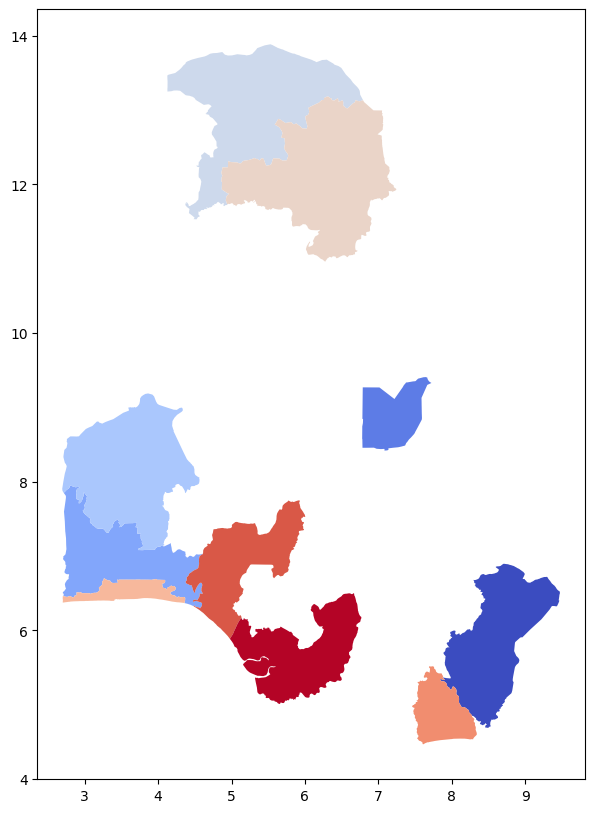

In [11]:
nigeria.plot(cmap='coolwarm',  figsize=(10, 10))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 12 to 303
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   292 non-null    datetime64[ns]
 1   Location               292 non-null    object        
 2   Suspected Cases        292 non-null    object        
 3   New Cases              292 non-null    int64         
 4   Total Confirmed Cases  292 non-null    int64         
 5   Deaths                 292 non-null    int64         
 6   Recovered              292 non-null    int64         
 7   Long                   292 non-null    float64       
 8   Lat                    292 non-null    float64       
 9   Active_Cases           292 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 25.1+ KB


+ ### coverting Object to interger but came back to me as float i will deal with it now

In [16]:


df['Suspected Cases'] = pd.to_numeric(df['Suspected Cases'], downcast='integer', errors='coerce')

+ ### i will convert it to int now

In [17]:
df.isnull()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
12,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
299,False,False,True,False,False,False,False,False,False,False
300,False,False,True,False,False,False,False,False,False,False
301,False,False,True,False,False,False,False,False,False,False
302,False,False,True,False,False,False,False,False,False,False


In [18]:
df.tail()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
299,2020-03-30,Oyo,NaN,1,8,0,0,3.90,7.38,8
300,2020-03-30,Plateau,NaN,0,0,0,0,8.90,9.92,0
301,2020-03-30,Rivers,NaN,0,1,0,0,7.00,4.75,1
302,2020-03-30,Sokoto,NaN,0,0,0,0,13.04,5.21,0
303,2020-03-30,Yobe,NaN,0,0,0,0,11.95,11.73,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 12 to 303
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   292 non-null    datetime64[ns]
 1   Location               292 non-null    object        
 2   Suspected Cases        211 non-null    float64       
 3   New Cases              292 non-null    int64         
 4   Total Confirmed Cases  292 non-null    int64         
 5   Deaths                 292 non-null    int64         
 6   Recovered              292 non-null    int64         
 7   Long                   292 non-null    float64       
 8   Lat                    292 non-null    float64       
 9   Active_Cases           292 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 25.1+ KB


In [20]:
pd.isnull(df).sum()

Date                      0
Location                  0
Suspected Cases          81
New Cases                 0
Total Confirmed Cases     0
Deaths                    0
Recovered                 0
Long                      0
Lat                       0
Active_Cases              0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
pd.isnull(df).sum()

Date                     0
Location                 0
Suspected Cases          0
New Cases                0
Total Confirmed Cases    0
Deaths                   0
Recovered                0
Long                     0
Lat                      0
Active_Cases             0
dtype: int64

In [23]:
df['Suspected Cases'] = df['Suspected Cases'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 12 to 222
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   211 non-null    datetime64[ns]
 1   Location               211 non-null    object        
 2   Suspected Cases        211 non-null    int32         
 3   New Cases              211 non-null    int64         
 4   Total Confirmed Cases  211 non-null    int64         
 5   Deaths                 211 non-null    int64         
 6   Recovered              211 non-null    int64         
 7   Long                   211 non-null    float64       
 8   Lat                    211 non-null    float64       
 9   Active_Cases           211 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(1)
memory usage: 17.3+ KB


In [25]:
cs = pd.pivot_table(df, values = ["Suspected Cases","Total Confirmed Cases", "Deaths", "Recovered"],
                                index = "Location ", aggfunc = max)

In [26]:
cs

,Deaths,Recovered,Suspected Cases,Total Confirmed Cases
Location,,,,
A/Ibom,0,0,1,0
Adamawa,0,0,2,0
Bauchi,0,0,27,2
Bayelsa,0,0,1,0
Cross River,0,0,2,0
Delta,0,0,1,0
Ebonyi,0,0,1,0
Edo,0,0,1,0
Edo,0,0,16,2


In [27]:
df.head()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
12,2020-03-06,Ogun,3,0,1,0,0,8.52,8.48,1
13,2020-03-06,Lagos,9,0,0,0,0,3.33,6.58,0
14,2020-03-06,FCT,7,0,0,0,0,10.00,9.00,0
15,2020-03-06,Kano,1,0,0,0,0,12.00,8.51,0
16,2020-03-06,Edo,1,0,0,0,0,5.60,6.32,0


In [28]:
cs["Recovery Rate"] = cs["Recovered"]*100/cs['Total Confirmed Cases']
cs["Death Rate"] = cs["Deaths"]*100/cs['Total Confirmed Cases']

In [29]:
cs

,Deaths,Recovered,Suspected Cases,Total Confirmed Cases,Recovery Rate,Death Rate
Location,,,,,,
A/Ibom,0,0,1,0,NaN,NaN
Adamawa,0,0,2,0,NaN,NaN
Bauchi,0,0,27,2,0.000000,0.000000
Bayelsa,0,0,1,0,NaN,NaN
Cross River,0,0,2,0,NaN,NaN
Delta,0,0,1,0,NaN,NaN
Ebonyi,0,0,1,0,NaN,NaN
Edo,0,0,1,0,NaN,NaN
Edo,0,0,16,2,0.000000,0.000000


In [30]:
a = cs.sort_values(by= "Total Confirmed Cases", ascending = False)

In [31]:
a

,Deaths,Recovered,Suspected Cases,Total Confirmed Cases,Recovery Rate,Death Rate
Location,,,,,,
Lagos,0,0,122,52,0.000000,0.000000
FCT,1,0,98,14,0.000000,7.142857
Oyo,0,0,4,3,0.000000,0.000000
Ogun,0,2,5,3,66.666667,0.000000
Bauchi,0,0,27,2,0.000000,0.000000
Edo,0,0,16,2,0.000000,0.000000
Enugu,0,0,4,2,0.000000,0.000000
Rivers,0,0,8,1,0.000000,0.000000
Osun,0,0,1,1,0.000000,0.000000


In [32]:
a.drop(['Recovery Rate', 'Death Rate'], inplace=True, axis=1)

In [33]:
a

,Deaths,Recovered,Suspected Cases,Total Confirmed Cases
Location,,,,
Lagos,0,0,122,52
FCT,1,0,98,14
Oyo,0,0,4,3
Ogun,0,2,5,3
Bauchi,0,0,27,2
Edo,0,0,16,2
Enugu,0,0,4,2
Rivers,0,0,8,1
Osun,0,0,1,1


In [34]:
df.head()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
12,2020-03-06,Ogun,3,0,1,0,0,8.52,8.48,1
13,2020-03-06,Lagos,9,0,0,0,0,3.33,6.58,0
14,2020-03-06,FCT,7,0,0,0,0,10.00,9.00,0
15,2020-03-06,Kano,1,0,0,0,0,12.00,8.51,0
16,2020-03-06,Edo,1,0,0,0,0,5.60,6.32,0


In [35]:
df['Location ']

12        Ogun
13       Lagos
14         FCT
15        Kano
16         Edo
        ...   
218        Oyo
219    Plateau
220     Rivers
221     Sokoto
222       Yobe
Name: Location , Length: 211, dtype: object

In [36]:
a.style.background_gradient(cmap='autumn')

,Deaths,Recovered,Suspected Cases,Total Confirmed Cases
Location,,,,
Lagos,0,0,122,52
FCT,1,0,98,14
Oyo,0,0,4,3
Ogun,0,2,5,3
Bauchi,0,0,27,2
Edo,0,0,16,2
Enugu,0,0,4,2
Rivers,0,0,8,1
Osun,0,0,1,1


+ ## Top Ten (10)  Active Cases States in Nigeria as at 30:03:2020

In [37]:
active_cases_in_desecnding_order = df.groupby(by='Location ').max()[['Active_Cases',
                                                                         
                                                                         'Date']].sort_values(by=['Active_Cases'],ascending=False).reset_index()

In [38]:
active_cases_in_desecnding_order

,Location,Active_Cases,Date
0,Lagos,52,2020-03-27
1,FCT,13,2020-03-27
2,Oyo,3,2020-03-27
3,Bauchi,2,2020-03-27
4,Edo,2,2020-03-27
5,Enugu,2,2020-03-27
6,Ogun,2,2020-03-27
7,Rivers,1,2020-03-27
8,Osun,1,2020-03-27
9,Ekiti,1,2020-03-27


In [39]:
top_10_active_cases = active_cases_in_desecnding_order.iloc[:10]
top_10_active_cases

,Location,Active_Cases,Date
0,Lagos,52,2020-03-27
1,FCT,13,2020-03-27
2,Oyo,3,2020-03-27
3,Bauchi,2,2020-03-27
4,Edo,2,2020-03-27
5,Enugu,2,2020-03-27
6,Ogun,2,2020-03-27
7,Rivers,1,2020-03-27
8,Osun,1,2020-03-27
9,Ekiti,1,2020-03-27


+ ## plotting The top Case State

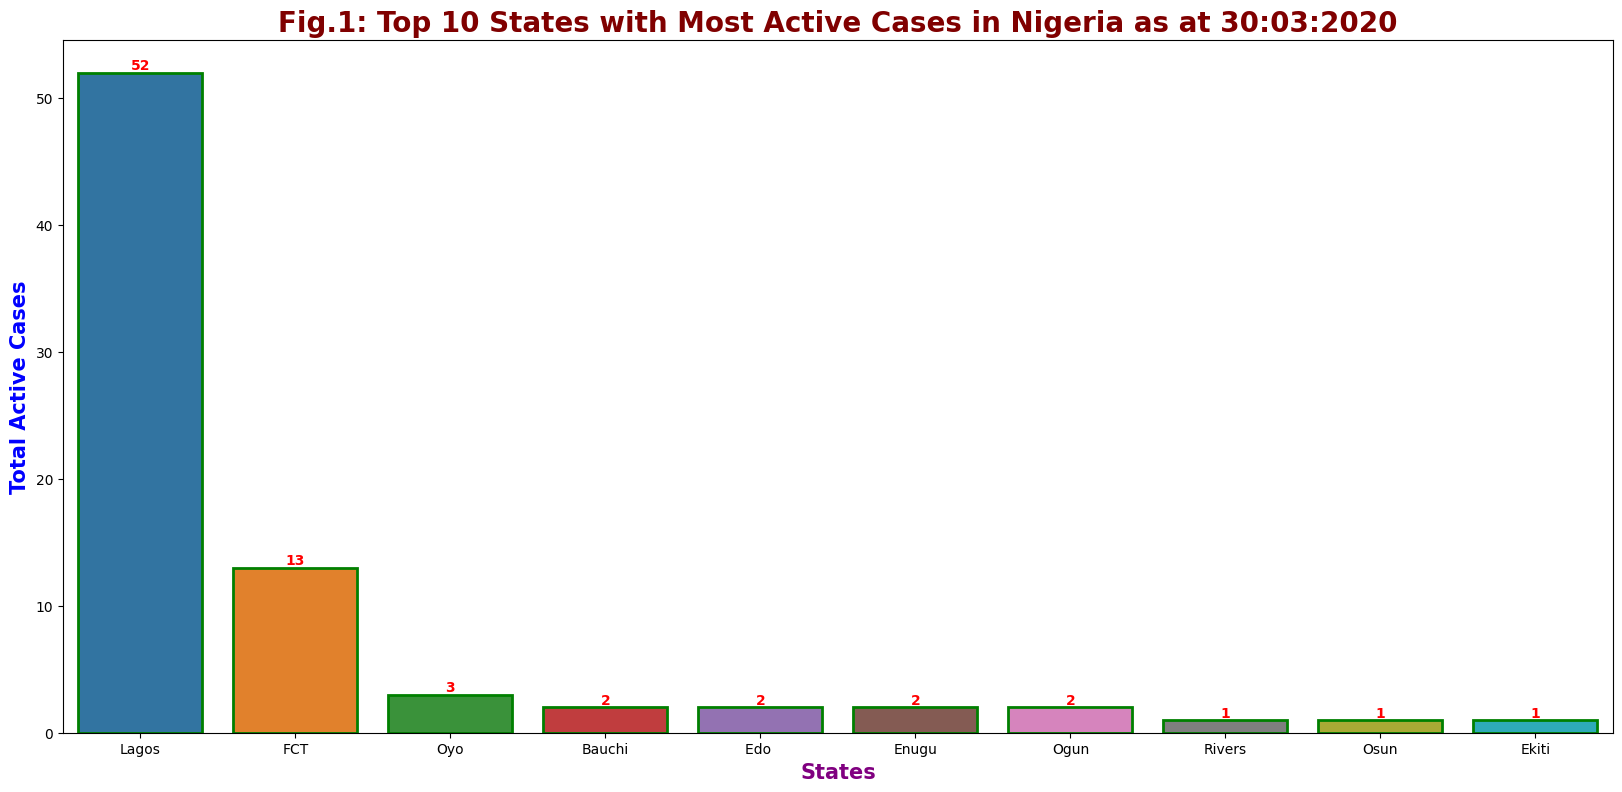

In [40]:

fig = plt.figure(figsize=(20,9))
plt.title("Fig.1: Top 10 States with Most Active Cases in Nigeria as at 30:03:2020",  color='maroon', size=20, weight='bold')
ax = sns.barplot(data = top_10_active_cases, y='Active_Cases', x='Location ', linewidth=2, edgecolor='green')
plt.xlabel('States',  color='purple', size=15, weight='bold' )
plt.ylabel('Total Active Cases',  color='blue', size=15, weight='bold' )
for bars in ax.containers:
    ax.bar_label(bars, weight='bold', color='r')
plt.show()

+ ### Top States with Highest Death

In [41]:
d = df.groupby(by = 'Location ' ).max()[['Deaths',
                                                                                'Date']].sort_values(by=['Deaths'],
ascending=False).reset_index()
d

,Location,Deaths,Date
0,FCT,1,2020-03-27
1,A/Ibom,0,2020-03-27
2,Kano,0,2020-03-27
3,Sokoto,0,2020-03-27
4,Rivers,0,2020-03-27
5,Plateau,0,2020-03-27
6,Oyo,0,2020-03-27
7,Osun,0,2020-03-27
8,Ondo,0,2020-03-27
9,Ogun,0,2020-03-27


+ ## as at 27th of March 2020 the number of Death in Nigeria was 1 and it's from Abuja

+ ## Pandermic Trend

In [42]:
df.head()

,Date,Location,Suspected Cases,New Cases,Total Confirmed Cases,Deaths,Recovered,Long,Lat,Active_Cases
12,2020-03-06,Ogun,3,0,1,0,0,8.52,8.48,1
13,2020-03-06,Lagos,9,0,0,0,0,3.33,6.58,0
14,2020-03-06,FCT,7,0,0,0,0,10.00,9.00,0
15,2020-03-06,Kano,1,0,0,0,0,12.00,8.51,0
16,2020-03-06,Edo,1,0,0,0,0,5.60,6.32,0


In [43]:
d = df.groupby(by = 'Location ' ).max()[['Suspected Cases','Date']].sort_values(by=['Suspected Cases'],ascending=False).reset_index()
d

,Location,Suspected Cases,Date
0,Lagos,122,2020-03-27
1,FCT,98,2020-03-27
2,Bauchi,27,2020-03-27
3,Edo,16,2020-03-27
4,Nassarawa,9,2020-03-27
5,Rivers,8,2020-03-27
6,Kano,6,2020-03-27
7,Ekiti,6,2020-03-27
8,Ogun,5,2020-03-27
9,Ondo,5,2020-03-27


In [44]:
d1 = d.nlargest(n=5, columns='Suspected Cases')

In [45]:
d1

,Location,Suspected Cases,Date
0,Lagos,122,2020-03-27
1,FCT,98,2020-03-27
2,Bauchi,27,2020-03-27
3,Edo,16,2020-03-27
4,Nassarawa,9,2020-03-27


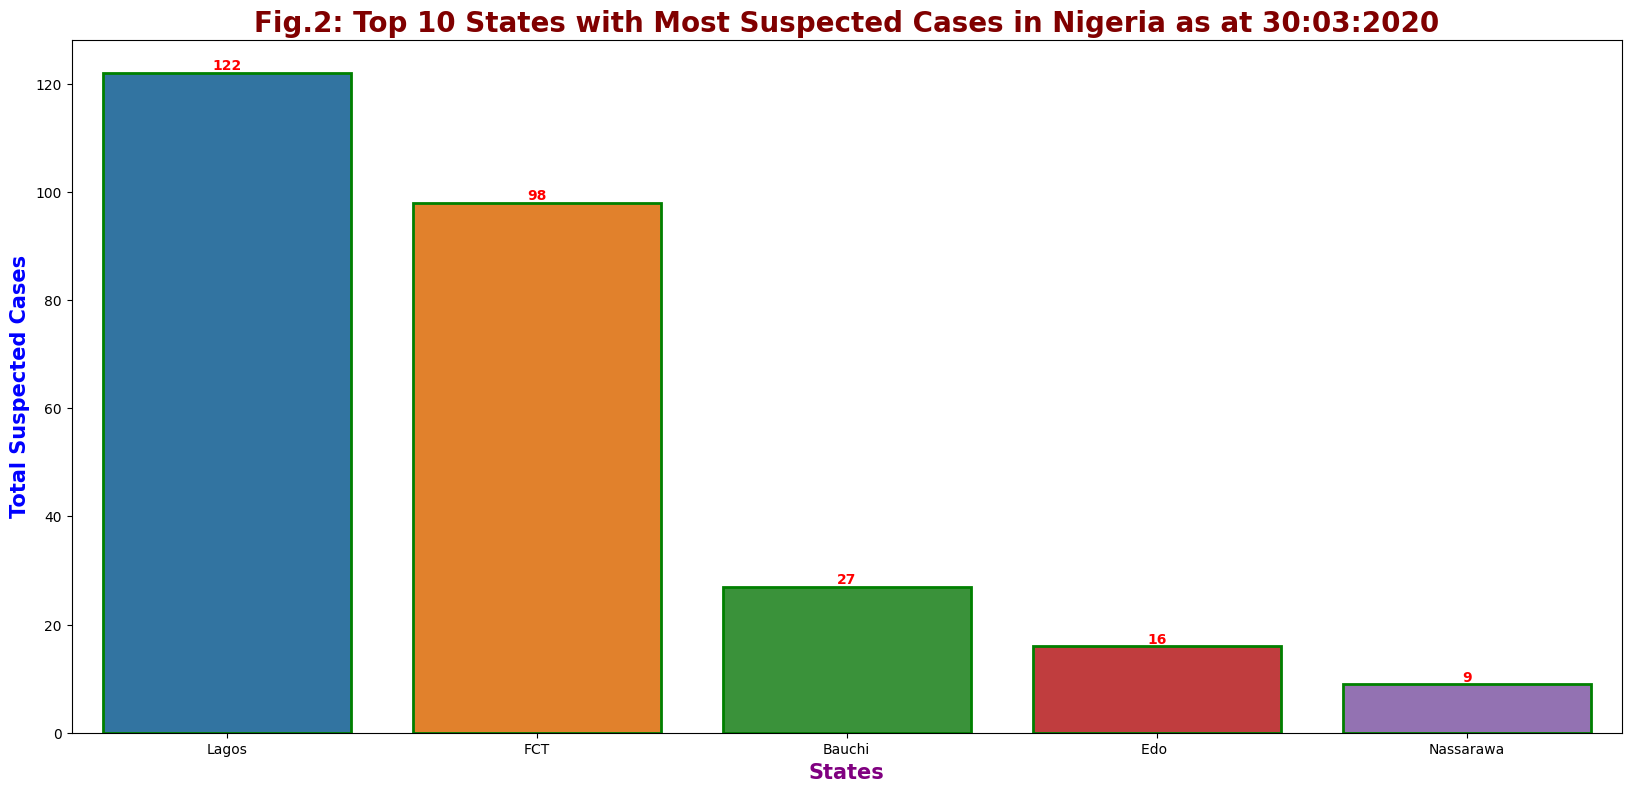

In [46]:
fig = plt.figure(figsize=(20,9))
plt.title("Fig.2: Top 10 States with Most Suspected Cases in Nigeria as at 30:03:2020",  color='maroon', size=20, weight='bold')
ax = sns.barplot(data = d1, y='Suspected Cases', x='Location ', linewidth=2, edgecolor='green')
plt.xlabel('States',  color='purple', size=15, weight='bold' )
plt.ylabel('Total Suspected Cases',  color='blue', size=15, weight='bold' )
for bars in ax.containers:
    ax.bar_label(bars, weight='bold', color='r')
plt.show()

In [47]:
d1[['Suspected Cases', 'Location ']]

,Suspected Cases,Location
0,122,Lagos
1,98,FCT
2,27,Bauchi
3,16,Edo
4,9,Nassarawa


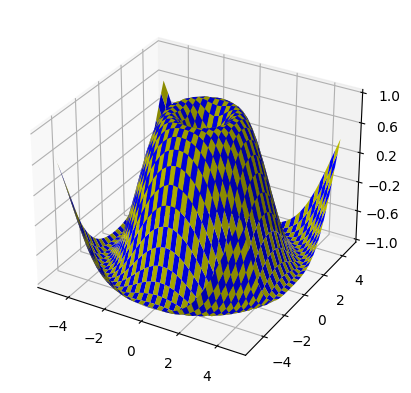

In [52]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()

+ ## Using Geopandas to convert Long & Lat to POINTS

In [13]:
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Long, df.Lat))

In [14]:
df_geo

,Date,Location,Suspected Cases,Nr. Of New Cases,Total Confirmed Cases,Source,Deaths,Recovered,Long,Lat,geometry
0,2020-02-27,Ogun,NaN,1,1,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,8.52,8.48,POINT (8.52000 8.48000)
1,2020-02-27,Lagos,NaN,0,0,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,3.33,6.58,POINT (3.33000 6.58000)
2,2020-03-01,Ogun,NaN,0,1,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,8.52,8.48,POINT (8.52000 8.48000)
3,2020-03-01,Lagos,NaN,0,0,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,3.33,6.58,POINT (3.33000 6.58000)
4,2020-03-02,Ogun,NaN,0,1,https://ncdc.gov.ng/themes/common/files/sitrep...,0,0,8.52,8.48,POINT (8.52000 8.48000)
...,...,...,...,...,...,...,...,...,...,...,...
299,2020-03-30,Oyo,N/a,1,8,https://twitter.com/NCDCgov/status/12447161352...,0,0,3.90,7.38,POINT (3.90000 7.38000)
300,2020-03-30,Plateau,N/a,0,0,https://twitter.com/NCDCgov/status/12447161352...,0,0,8.90,9.92,POINT (8.90000 9.92000)
301,2020-03-30,Rivers,N/a,0,1,https://twitter.com/NCDCgov/status/12447161352...,0,0,7.00,4.75,POINT (7.00000 4.75000)
302,2020-03-30,Sokoto,N/a,0,0,https://twitter.com/NCDCgov/status/12447161352...,0,0,13.04,5.21,POINT (13.04000 5.21000)


<AxesSubplot:>

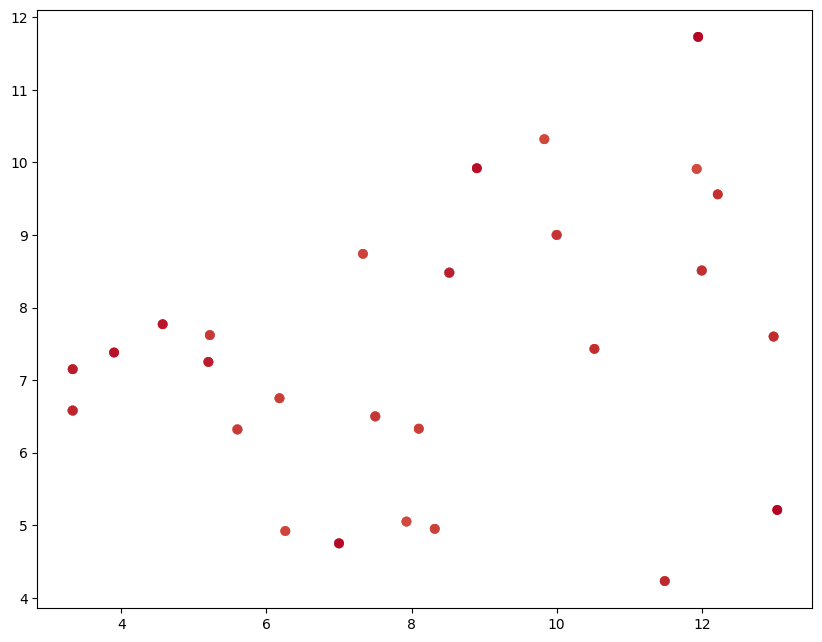

In [15]:
df_geo.plot(cmap='coolwarm',  figsize=(10, 10))

+ ## Using Geopandas Built in Dataset

In [72]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


+ ## Plotting the Map

In [ ]:
nigeria.plot(cmap='coolwarm',  figsize=(10, 10))